In [1]:
# Module 4 (assignment)
# Plot the average anomaly map for the [psl] or [ts] variable, between the periods 1950-2000 and 1900-1950. 
# Free choice of the model. 

In [3]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import xarray as xr

In [4]:
# I chose MIROC6 psl (psl2) from the example above

model='MIROC6'
modfile0=''.join(['./psl_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])
ds0 = xr.open_dataset(modfile0)

psl=ds0.psl /100

last = psl.sel(time=slice("1951-01", "2000-12"))
first = psl.sel(time=slice("1901-01", "1950-12"))
#print(len(last)/12)

diff = last.mean(axis=0)-first.mean(axis=0)

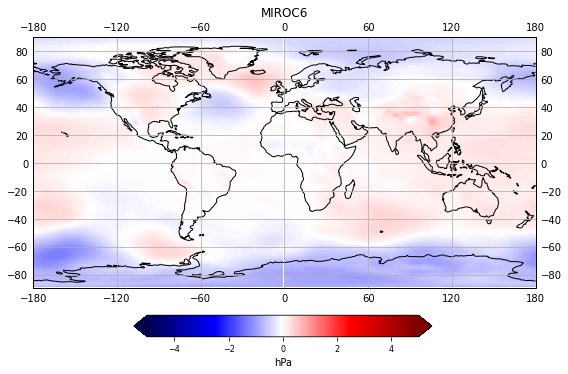

In [5]:
# Plot

fig = plt.figure(figsize=(9,6))  # x,y(inches)

tmax = 5
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap = mpl.cm.seismic

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(psl.lon, psl.lat, diff, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm  )   

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('hPa')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()